<a href="https://colab.research.google.com/github/HARIS2003JULY/DataScienceCCp/blob/main/DATASCEINCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# View first 5 rows
df.head()


,CO2_Emissions_ppm,Humidity_percent,Rainfall_mm,WindSpeed_kmh,SolarRadiation_Wm2,AvgTemperature_C
0,387.454012,41.107976,78.511705,26.908120,271.598763,8.242296
1,445.071431,62.514057,74.093640,31.867256,341.629699,7.681531
2,423.199394,82.376750,271.876374,10.018716,328.048279,7.501566
3,409.865848,73.933493,74.863860,24.994964,146.169971,7.980166
4,365.601864,78.393669,81.584918,22.869839,144.774841,6.537681


In [ ]:
# Dataset shape
df.shape


(1000, 6)

In [ ]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CO2_Emissions_ppm   1000 non-null   float64
 1   Humidity_percent    1000 non-null   float64
 2   Rainfall_mm         1000 non-null   float64
 3   WindSpeed_kmh       1000 non-null   float64
 4   SolarRadiation_Wm2  1000 non-null   float64
 5   AvgTemperature_C    1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [ ]:
# Statistical summary
df.describe()


,CO2_Emissions_ppm,Humidity_percent,Rainfall_mm,WindSpeed_kmh,SolarRadiation_Wm2,AvgTemperature_C
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,399.025655,60.421038,150.721718,19.615002,248.231597,7.844740
std,29.213736,17.531394,87.202259,11.459574,86.042983,1.551992
min,350.463202,30.193096,0.003490,0.026136,100.009216,3.158373
25%,373.597327,44.464456,78.405293,9.676031,173.492202,6.715939
50%,399.680738,61.124034,150.184176,19.371171,248.379429,7.865083
75%,424.431959,75.627903,227.731058,29.501632,321.998036,8.875168
max,449.971767,89.964824,299.346257,39.982308,399.324817,11.860029


In [ ]:
df.isnull().sum()


,0
CO2_Emissions_ppm,0
Humidity_percent,0
Rainfall_mm,0
WindSpeed_kmh,0
SolarRadiation_Wm2,0
AvgTemperature_C,0


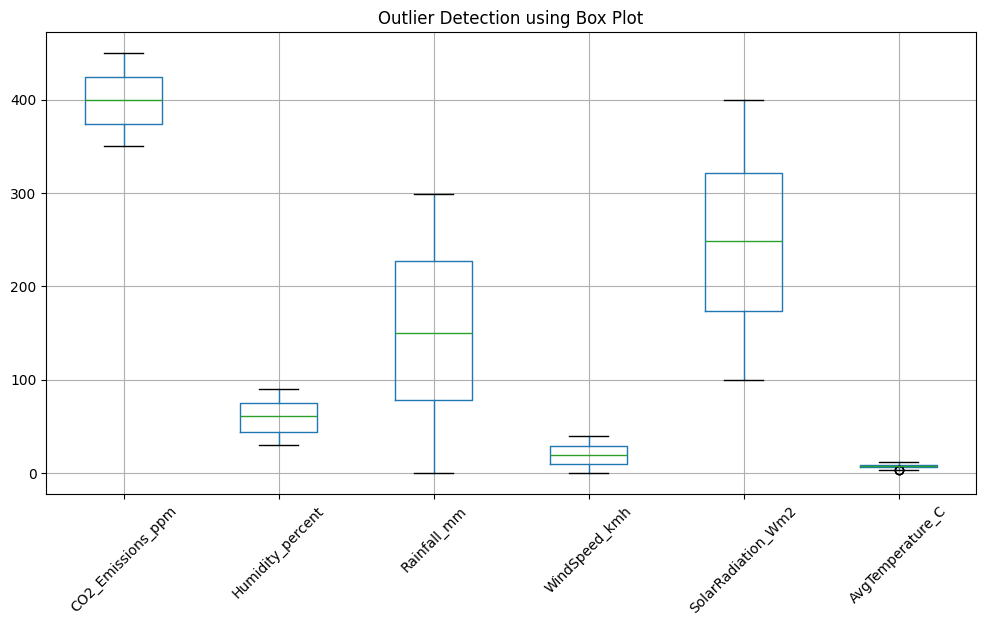

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection using Box Plot")
plt.show()


In [ ]:
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())




Features (X):
   CO2_Emissions_ppm  Humidity_percent  Rainfall_mm  WindSpeed_kmh  \
0         387.454012         41.107976    78.511705      26.908120   
1         445.071431         62.514057    74.093640      31.867256   
2         423.199394         82.376750   271.876374      10.018716   
3         409.865848         73.933493    74.863860      24.994964   
4         365.601864         78.393669    81.584918      22.869839   

   SolarRadiation_Wm2  
0          271.598763  
1          341.629699  
2          328.048279  
3          146.169971  
4          144.774841  

Target (y):
0    8.242296
1    7.681531
2    7.501566
3    7.980166
4    6.537681
Name: AvgTemperature_C, dtype: float64


In [ ]:
X_scaled[:5]




array([[-0.39630103, -1.10217857, -0.82848938,  0.63673984,  0.2717114 ],
       [ 1.57695733,  0.11944663, -0.8791793 ,  1.06970686,  1.08602506],
       [ 0.82789256,  1.25299211,  1.39004747, -0.83782241,  0.92810149],
       [ 0.37125061,  0.77114327, -0.87034231,  0.46970805, -1.18676377],
       [-1.14468466,  1.02568136, -0.79322939,  0.28416991, -1.20298622]])

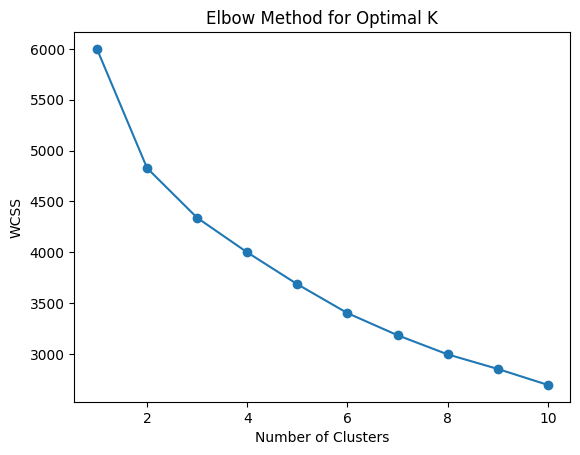

In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Climate_Cluster'] = clusters


In [ ]:
print(df.groupby('Climate_Cluster').mean())


                 CO2_Emissions_ppm  Humidity_percent  Rainfall_mm  \
Climate_Cluster                                                     
0                       370.525413         61.799694   153.692776   
1                       405.575874         52.416456   114.177754   
2                       423.233766         68.807720   192.782202   

                 WindSpeed_kmh  SolarRadiation_Wm2  AvgTemperature_C  
Climate_Cluster                                                       
0                    21.137218          208.466519          6.647764  
1                    19.298510          306.439815          9.316200  
2                    18.280558          221.003360          7.374088  


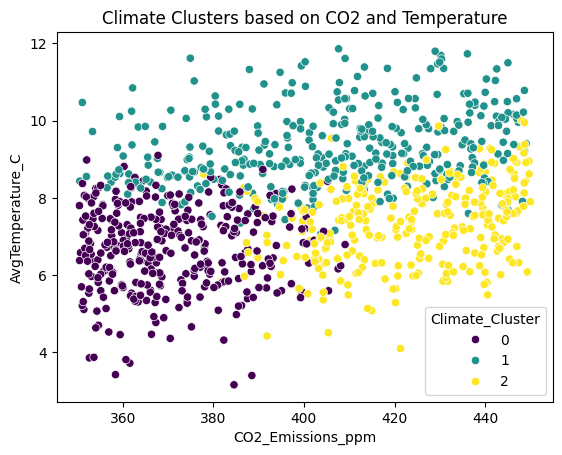

In [ ]:
plt.figure()
sns.scatterplot(
    x=df['CO2_Emissions_ppm'],
    y=df['AvgTemperature_C'],
    hue=df['Climate_Cluster'],
    palette='viridis'
)
plt.title('Climate Clusters based on CO2 and Temperature')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])






In [ ]:
# Use first column to generate a binary target
df['Climate_Risk'] = (df.iloc[:, 0] > df.iloc[:, 0].mean()).astype(int)


In [ ]:
X = df.drop('Climate_Risk', axis=1)
y = df['Climate_Risk']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 0.2572193650916456


In [ ]:
sfrom sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

df['Cluster'].value_counts()


,count
Cluster,
0,382
1,316
2,302


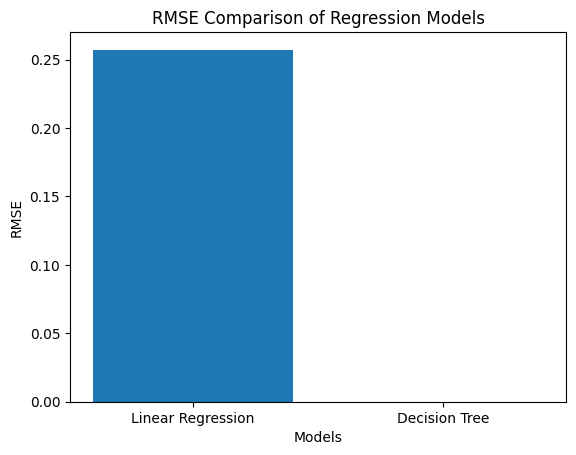

In [ ]:
import matplotlib.pyplot as plt

models = ["Linear Regression", "Decision Tree"]
rmse_scores = [lr_rmse, dt_rmse]

plt.figure()
plt.bar(models, rmse_scores)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Regression Models")
plt.show()




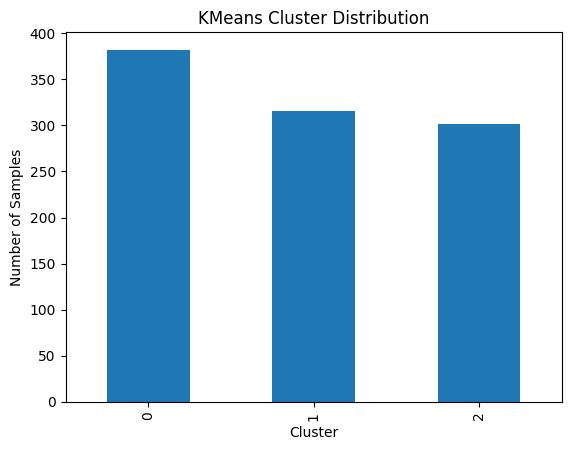

In [ ]:
df['Cluster'].value_counts().plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
plt.title("KMeans Cluster Distribution")
plt.show()


In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "Model Type": ["Regression", "Regression"],
    "Evaluation Metric": ["RMSE", "RMSE"],
    "Performance": [lr_rmse, dt_rmse]
})

comparison


,Model,Model Type,Evaluation Metric,Performance
0,Linear Regression,Regression,RMSE,0.257219
1,Decision Tree,Regression,RMSE,0.000000


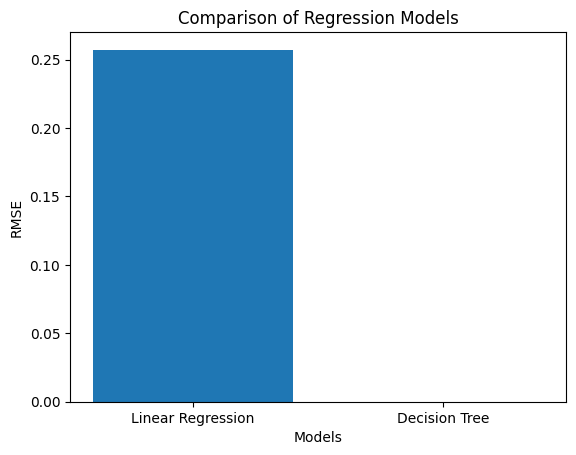

In [ ]:
import matplotlib.pyplot as plt

models = comparison["Model"]
scores = comparison["Performance"]

plt.figure()
plt.bar(models, scores)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Comparison of Regression Models")
plt.show()
